## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA2.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)


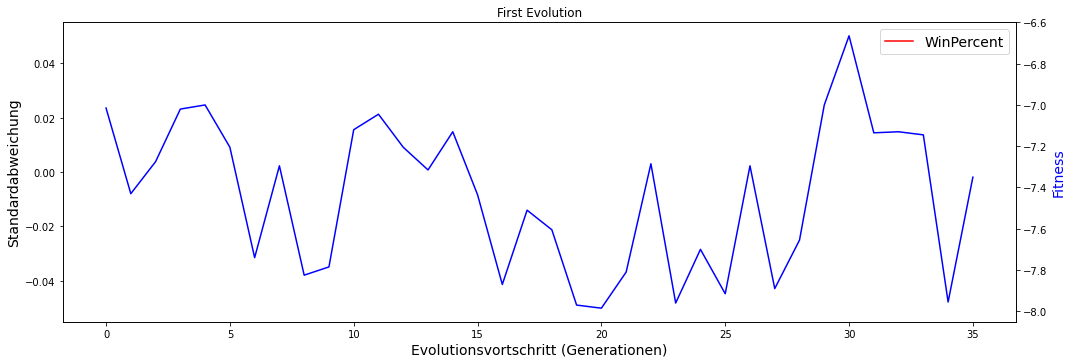

In [17]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsvortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)
#AttackMinLife, = ax1.plot(df_EA["AttackMinLife"].values, color='red', label='AttackMinLife')
#RadiusExpansionStep, = ax1.plot(df_EA["RadiusExpansionStep"].values, color='red', label='RadiusExpansionStep')
#MaxConquerRadius, = ax1.plot(df_EA["MaxConquerRadius"].values, color='green', label='MaxConquerRadius')
#InitialConquerRadius, = ax1.plot(df_EA["InitialConquerRadius"].values, color='black', label='InitialConquerRadius')
#Score, = ax1.plot(df_EA["Score"].values, color='red', label='Score')
#Fitness, = ax1.plot(df_EA["Fitness"].values, color='red', label='Fitness')
#TownLifeSum, = ax1.plot(df_EA["TownLifeSum"].values, color='red', label='TownLifeSum')

WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='red', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["AttackMinLife"].values, color='red', label='Fitness')
#std, = ax1.plot(df_standardDeviation["RadiusExpansionStep"].values, color='red', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["MaxConquerRadius"].values, color='green', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["InitialConquerRadius"].values, color='black', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='blue'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(df_Mean["GameTime"].values, color=color)
ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()